In [1]:
# I was not really sure what I could to differently compared to basic assigment. So I mostly did same exercises.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
###
from IPython.display import display
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "#FFFFFF"
###

## dataset source: https://archive.ics.uci.edu/ml/datasets/Wine

ww_df = pd.read_csv('winequality-white.csv', sep = ';')
ww_df.name = 'White Wine'

rw_df = pd.read_csv('winequality-red.csv', sep = ';')
rw_df.name = 'Red Wine'

dframes = [ww_df,rw_df]

In [2]:
print('White Wine')
display(ww_df.head(5))
print('Red Wine')
display(rw_df.head(5))

White Wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Red Wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


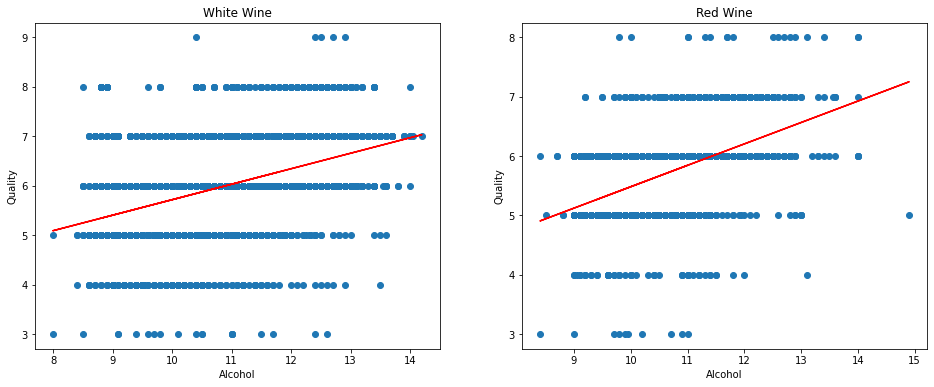

In [3]:
f = plt.figure(figsize = (16,6))
for i,df in enumerate(dframes):
  X = df['alcohol'].values.reshape(-1,1)
  y = df['quality'].values.reshape(-1)

  m = LinearRegression()
  _= m.fit(X,y)
  y_pred = m.predict(X)
  ax = f.add_subplot(1,2,i+1)
  ax.scatter(X,y)
  ax.plot(X, y_pred, c = 'red')
  ax.set_xlabel('Alcohol')
  ax.set_ylabel('Quality')
  ax.set_title(df.name)

plt.show()


## Check which features are most accurate

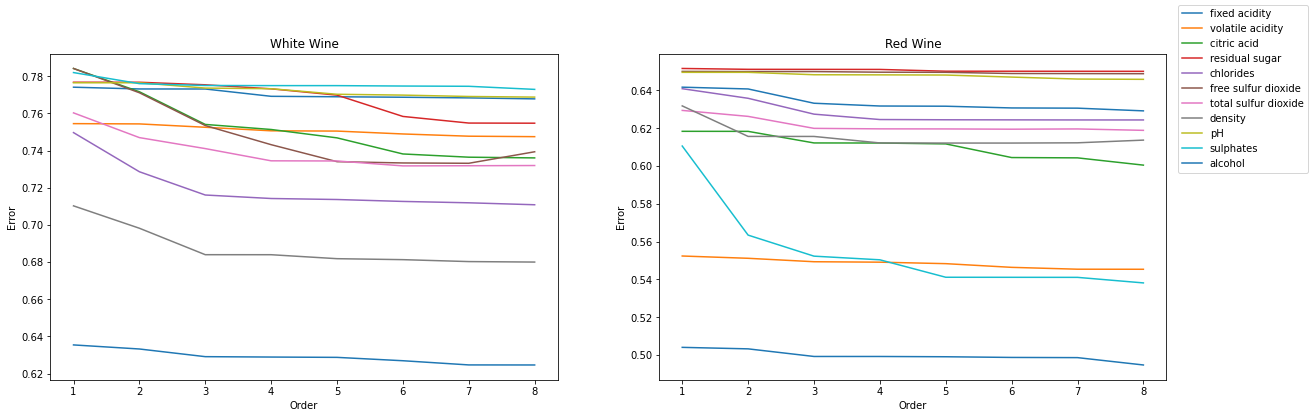

In [4]:
f = plt.figure(figsize = (20,6))
for i,df in enumerate(dframes):
  y = df['quality'].values.reshape(-1)
  features = df.columns[:11]
  ax = f.add_subplot(1,2,i+1)
  for feature in features:
    order_error = []
    X = df[feature].values.reshape(-1,1)
    x_fit = np.linspace(X.min(),X.max(),200).reshape(-1,1)
    for order in range(1,9):  
      poly = PolynomialFeatures(order, include_bias = False)
      X_order = poly.fit_transform(X)
      m = LinearRegression()
      m.fit(X_order,y)
      order_error += [mean_squared_error(y,m.predict(X_order))]
    ax.plot(list(range(1,9)), order_error, label = feature)
    ax.set_xlabel('Order')
    ax.set_ylabel('Error')
    ax.set_title(df.name)
    
# all axes have same labels so just get them from last one
handles, labels = ax.get_legend_handles_labels()
f.legend(handles, labels, loc='upper right')
plt.show()  


### For white wine, alcohol is the best feature with second best being density.  
### For red wine, alcohol is also the best feature.

## Let's check which degree gives us the best results.

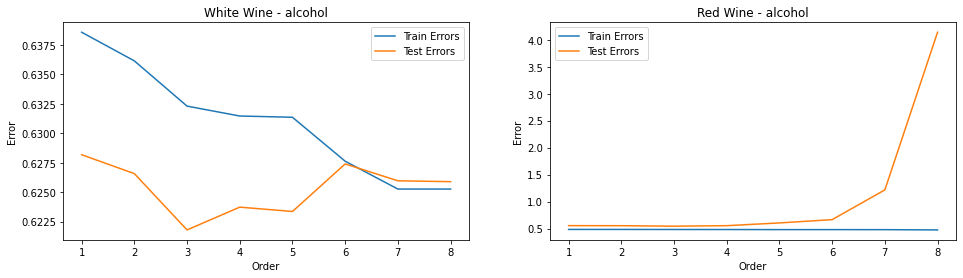

In [5]:
feature = 'alcohol'
f = plt.figure(figsize = (16,4))
for i,df in enumerate(dframes):
  train_errors = []
  test_errors = []
  for order in range(1,9):  
    poly = PolynomialFeatures(order, include_bias = False)
    y = df['quality'].values.reshape(-1)
    X = df[feature].values.reshape(-1,1)
    X_order = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=33)
    
    m = LinearRegression()
    _ = m.fit(X_train,y_train)
    train_errors += [mean_squared_error(y_train,m.predict(X_train))]
    test_errors += [mean_squared_error(y_test,m.predict(X_test))]
  ax = f.add_subplot(1,2,i+1)
  ax.plot(list(range(1,9)),train_errors,label = 'Train Errors')
  ax.plot(list(range(1,9)),test_errors,label = 'Test Errors')
  ax.set_xlabel('Order')
  ax.set_ylabel('Error')
  ax.set_title(f'{df.name} - {feature}')
  ax.legend()
plt.show()

## For white wine degree 3 is the best no question.
## For red wine, that's not as clear but with closer inspection, degree 3 is also the best here 4 has slightly bigger error that 3.

## Now let's try some different models and check which is best for white wine and which for red wine.

In [6]:
def train_model(df,features,degree = 3):
  poly = PolynomialFeatures(degree = order,include_bias = False)
  X = poly.fit_transform(df[features].values.reshape(-1,len(features)))
  y = df['quality'].values.reshape(-1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=33)  
  m = LinearRegression()
  m.fit(X_train,y_train)
  error = mean_squared_error(y_test,m.predict(X_test))
  return m,error

## Some models to test
models = [
  ['alcohol'],
  ['density'],
  ['sulphates'],
  ['density','alcohol'],
  ['alcohol','density'],
  ['alcohol','chlorides'],
  ['alcohol','volatile acidity'],
  ['alcohol','density','volatile acidity'],
]

ww_best = (None,None,float('inf'))
rw_best = (None,None,float('inf'))
models_data = pd.DataFrame(columns = ['White Wine Error','Red Wine Error'])
models_data.index.name = 'Model'
for model in models:
  w = train_model(ww_df,model)
  if w[1] < ww_best[2]:
    ww_best = (model,w[0],w[1])
  
  r = train_model(rw_df,model)
  if r[1] < rw_best[2]:
    rw_best = (model,r[0],r[1])
  models_data = models_data.append(pd.Series({'Red Wine Error':r[1],'White Wine Error':w[1]}, name = str(model)))

display(models_data.style.highlight_min(axis=0,color="darkred"))




,White Wine Error,Red Wine Error
Model,,
['alcohol'],0.618595,2.677474
['density'],0.676363,0.637537
['sulphates'],0.781564,0.695806
"['density', 'alcohol']",0.616596,12.857552
"['alcohol', 'density']",0.616606,2.043156
"['alcohol', 'chlorides']",0.702619,20.828947
"['alcohol', 'volatile acidity']",18.314657,1.797837
"['alcohol', 'density', 'volatile acidity']",5828.124728,9.160312


## Best feature(s) are:
### For white wine 'density' and 'alcohol'
### For red wine 'density'.
## We can also see that features like sulphates and volatile acidity, don't really affect quality of wine but it also could be that our data is biased towards alcohol and density.